# Calibrating tweezer spacings on the andor camera

Done July 11th 2018, after switching to ~1.5m lens. This calibration is for picking tweezer frequencies for both the main tweezers and the aux tweezers.

In [1]:
# current date, for retrieving data from proper location.
year = "2018"
month = "July"
day = "11"

## Imports and initialization

In [2]:
import numpy as np
from numpy import array as arr
import pandas as pd
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True);

In [3]:
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
style.use(['dark_background'])
style.use(['seaborn-dark-palette'])

### old solarized stuff
# style.use(['dark_background'])
# mpl.rcParams['axes.facecolor'] = '#0a0a0a'
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
rcParams['figure.figsize'] = (25.0, 8.0)
rcParams['axes.grid'] = True
rcParams['axes.formatter.useoffset'] = False
rcParams['grid.alpha'] = 0.3
rcParams['axes.formatter.limits'] = (-3,3)
# jet is awful.
rcParams['image.cmap'] = 'viridis'
# to see all available options, decomment this line.
# print(mpl.rcParams)
rcParams['font.size'] = 14

In [4]:
import math
import scipy.optimize as opt
from fitters import exponential_decay

In [5]:
from ExpFile import setPath
import ExpFile as exp
from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc

from importlib import reload
def reloadMyModules():
    reload(exp)
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)

reloadMyModules()
getVersions()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,Version
PrintVersions;,1.0
mainAnalysis:,1.4
AnalysisHelpers:,1.4
bokehPlotters:,1.0
fittingFunctions:,1.0
MarksConstants:,1.0
MarksFourierAnalysis:,1.0
matplotlibPlotters:,1.1
miscellaneous:,1.0
plotlyPlotters:,1.6


## aod

### data 1

In [229]:
with exp.ExpFile() as f:
    f.open_hdf5(31)
    pics = f.get_pics()

In [230]:
ox  = 220
oy = 200
w = h = 90
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

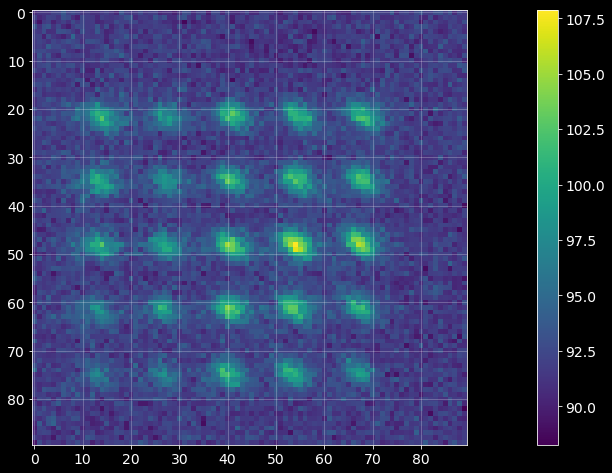

In [231]:
imshow(allPics)
colorbar()

### data 2

In [232]:
with exp.ExpFile() as f:
    f.open_hdf5(33)
    pics = f.get_pics()

In [233]:
ox  = 220
oy = 200
w = h = 90
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [234]:
from fitters import arb_2d_gaussian_sum

In [236]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])

In [237]:
X, Y = np.meshgrid(x,y)

In [80]:
from fitters import gaussian_2d

In [238]:
guess = [0]
for xg in range(5):
    for yg in range(5):
        guess += [10, 13+xg*14, 20+yg*14, 3, 3]

In [239]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [241]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [242]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

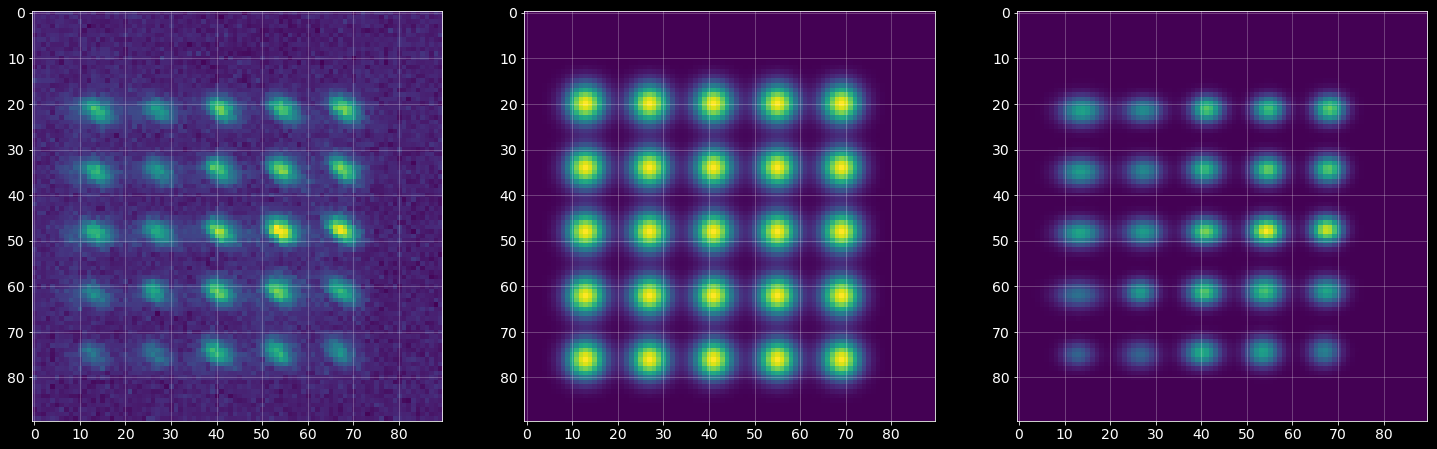

In [243]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [244]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [245]:
widths = []
for row in misc.transpose(x_pos):
    widths += [row[i+1]-row[i] for i in range(len(row)-1)]

In [246]:
heights = []
for row in y_pos:
    heights += [row[i+1]-row[i] for i in range(len(row)-1)]

In [247]:
print(misc.errString(np.mean(widths), np.std(widths),4))
print(misc.errString(np.mean(heights), np.std(heights),4))

13.54(24)
13.32(14)


In [248]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

2.35(38)


### result:

In [252]:
auxCal = (13.54 + 13.32) / 2
print(auxCal)

13.43


13.43 pixels / MHz

## tweezers

In [167]:
with exp.ExpFile() as f:
    f.open_hdf5(37)
    pics = f.get_pics()

In [180]:
ox  = 200
oy = 160
w = h = 110
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [185]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [203]:
guess = [80]
for xg in range(5):
    for yg in range(5):
        guess += [10, 20+xg*17, 15+yg*17, 2, 2]

In [199]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [204]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [206]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

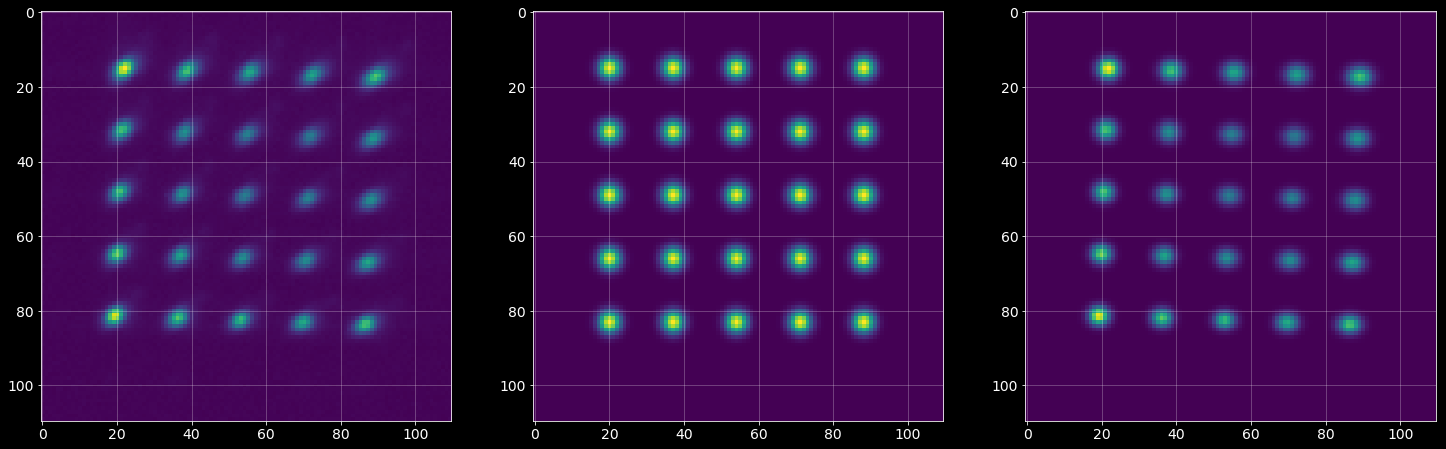

In [207]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [208]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [228]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.85(18)


In [214]:
d = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d += [np.sqrt(x**2 + y**2)]

In [217]:
d2 = []
for w, h in zip(misc.transpose(x_pos), misc.transpose(y_pos)):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d2 += [np.sqrt(x**2 + y**2)]

In [219]:
print(misc.errString(np.mean(d), np.std(d),4))
print(misc.errString(np.mean(d2), np.std(d2),4))

16.58(7)
16.81(5)


In [253]:
tweezerCal = (np.mean(d) + np.mean(d2)) / 2 / 18.8
print(tweezerCal)

0.8878552094771142


### result:

0.887855 pixels / MHz

In [1058]:
0.887755 * 8.6

7.6346929999999995

In [1060]:
8/auxCal

0.5956813104988831

In [1059]:
7.634 / auxCal

0.5684288905435593

## playing with numbers

In [254]:
tweezerCal * 9.4

8.345838969084873

In [255]:
8/tweezerCal

9.010478189018514

In [256]:
8 / auxCal

0.5956813104988831

In [257]:
auxCal / tweezerCal

15.126340259814828

# Scrap

horFreqs [38.0, 56.0, 74.0, 92.0, 110.0]
horAmps [1. 1. 1. 1. 1.]
Hor-Phases: ['0.2935062395', '0.3615720623', '2.234138203', '5.919893656', '0.000000000']
vertFreqs [38.0, 56.0, 74.0, 92.0, 110.0]
vertAmps [1. 1. 1. 1. 1.]
Vert-Phases: ['0.4633216305', '0.4522235112', '2.245135144', '5.852248409', '0.000000000']


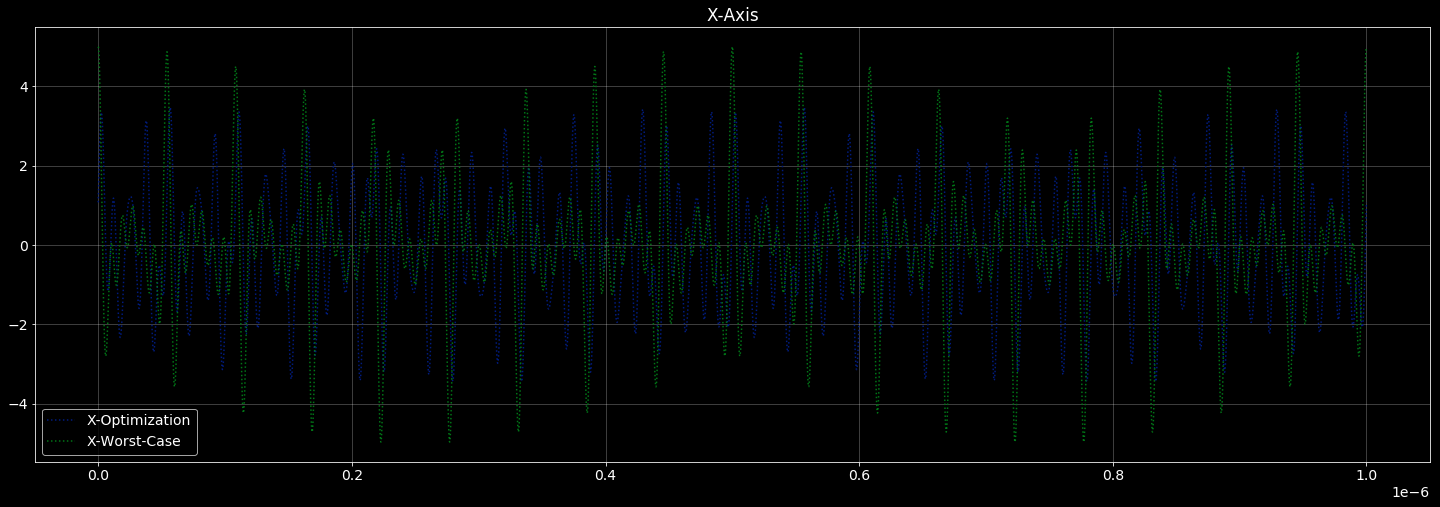

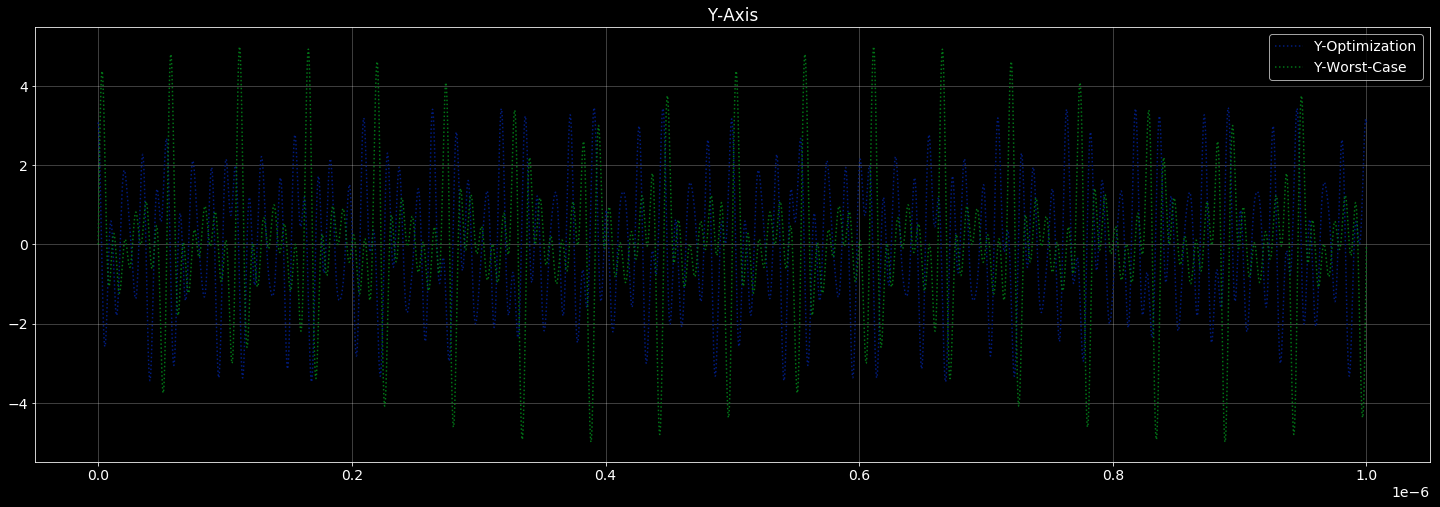

In [260]:
ah.maximizeAomPerformance(74, 74, 18, 5, 5);

# Brief Statbility Testing

## at 9:30 PM

### aux

In [337]:
day = '11'
reloadMyModules()

In [338]:
with exp.ExpFile() as f:
    f.open_hdf5(80)
    pics = f.get_pics()

In [339]:
ox  = 95
oy = 60
w = h = 100
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [341]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [342]:
guess = [80]
for xg in range(5):
    for yg in range(5):
        guess += [10, 20+xg*16, 20+yg*16, 2, 2]

In [343]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [345]:
vals_aux_930PM, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [347]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals_aux_930PM)
fit_im = np.resize(fit_data, X.shape)

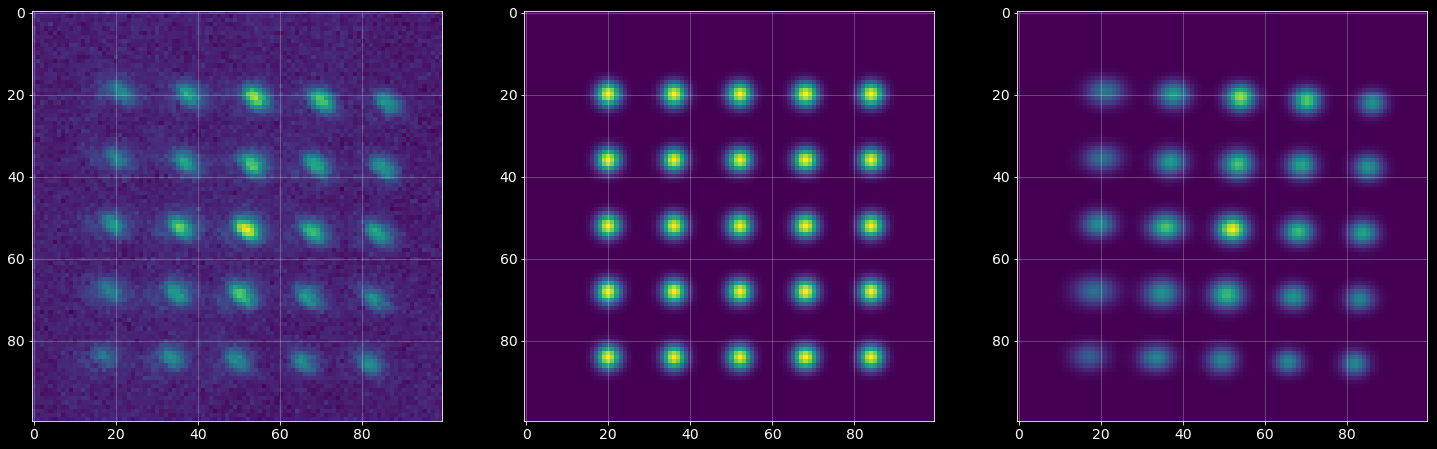

In [348]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

### tweezers

In [357]:
with exp.ExpFile() as f:
    f.open_hdf5(84)
    pics = f.get_pics()

In [358]:
ox  = 95
oy = 60
w = h = 100
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [359]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [366]:
guess = [80]
for xg in range(5):
    for yg in range(5):
        guess += [10, 22+xg*16, 21+yg*16, 2, 2]

In [367]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [369]:
vals_tweezers_930PM, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [370]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals_tweezers_930PM)
fit_im = np.resize(fit_data, X.shape)

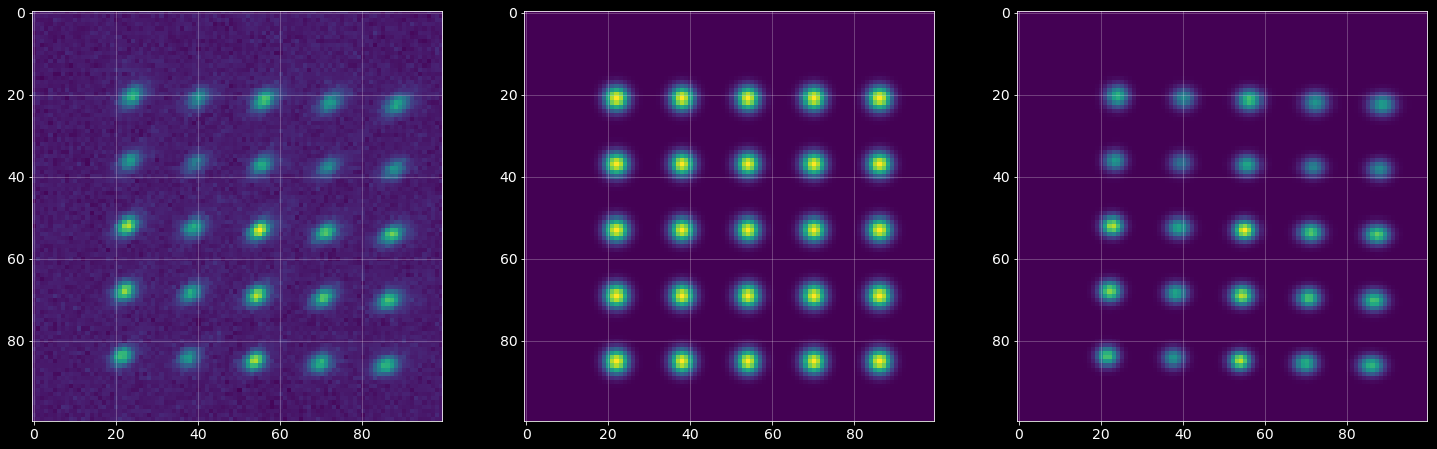

In [371]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

## 11:03AM The next Day

### tweezers

#### opps left lights on

In [372]:
day = '12'
reloadMyModules()

In [373]:
with exp.ExpFile() as f:
    f.open_hdf5(2)
    pics = f.get_pics()

In [376]:
ox  = 95
oy = 60
w = h = 100
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

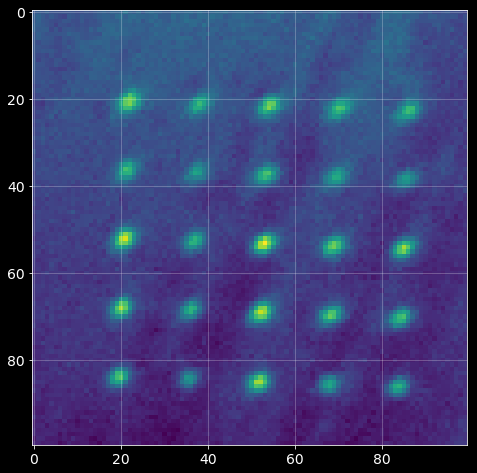

In [377]:
imshow(allPics)

#### data

In [378]:
day = '12'
reloadMyModules()

In [379]:
with exp.ExpFile() as f:
    f.open_hdf5(4)
    pics = f.get_pics()

In [380]:
ox  = 95
oy = 60
w = h = 100
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [381]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [382]:
guess = [80]
for xg in range(5):
    for yg in range(5):
        guess += [10, 20+xg*16, 22+yg*16, 2, 2]

In [383]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [385]:
vals_tweezers_11AM, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [386]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

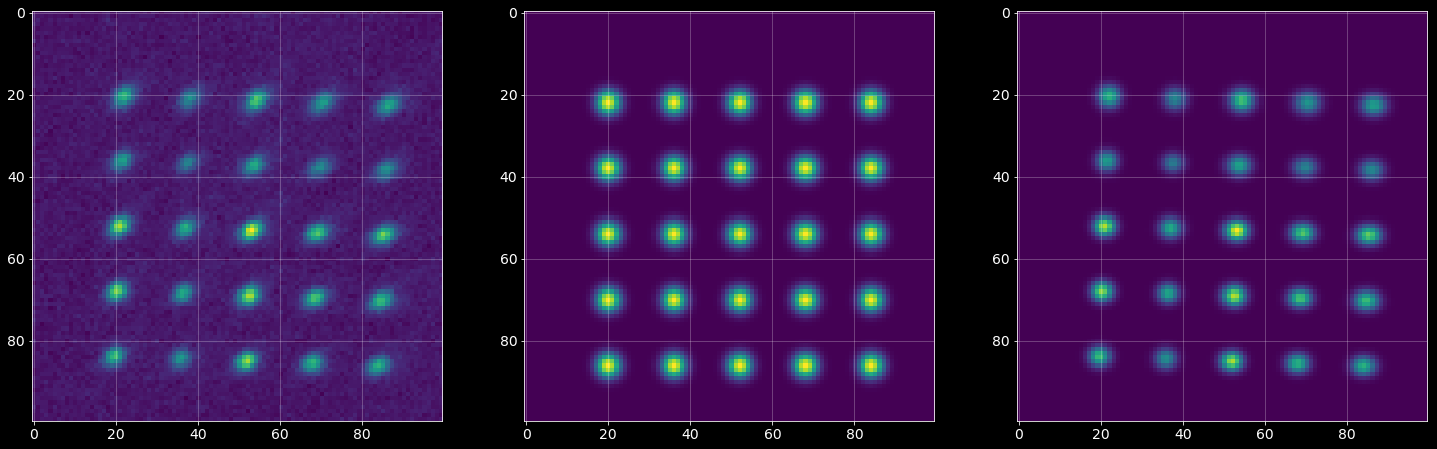

In [387]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

### aux

In [388]:
day = '12'
reloadMyModules()

In [390]:
with exp.ExpFile() as f:
    f.open_hdf5(6)
    pics = f.get_pics()

In [391]:
ox  = 95
oy = 60
w = h = 100
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [392]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [408]:
guess = [80]
for xg in range(5):
    for yg in range(5):
        guess += [10, 18+xg*16, 22+yg*16, 2, 2]

In [409]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

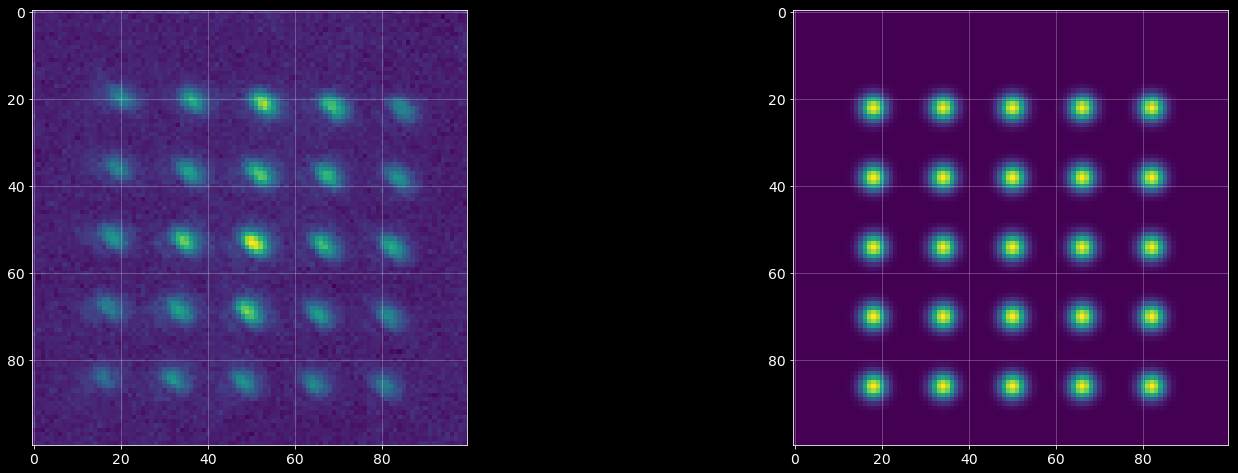

In [410]:
f, a = subplots(1,2)
a[0].imshow(allPics)
a[1].imshow(guess_im)

In [411]:
vals_aux_11AM, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [420]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals_aux_11AM)
fit_im = np.resize(fit_data, X.shape)

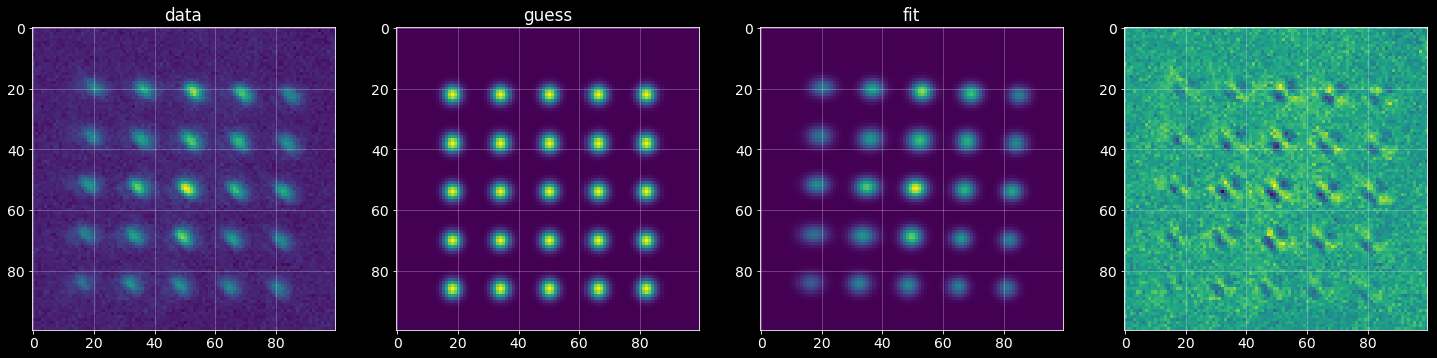

In [422]:
f, ax = subplots(1,4)
ax[0].imshow(allPics)
ax[0].set_title('data')
ax[1].imshow(guess_im)
ax[1].set_title('guess')
ax[2].imshow(fit_im)
ax[2].set_title('fit')
ax[3].imshow(allPics-fit_im)

## Comparison

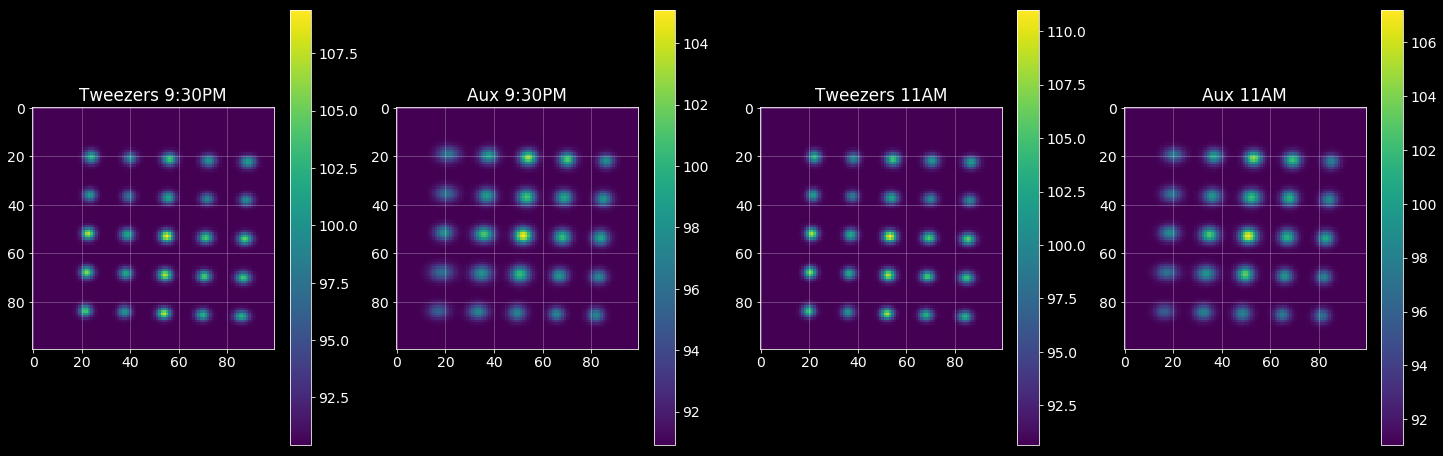

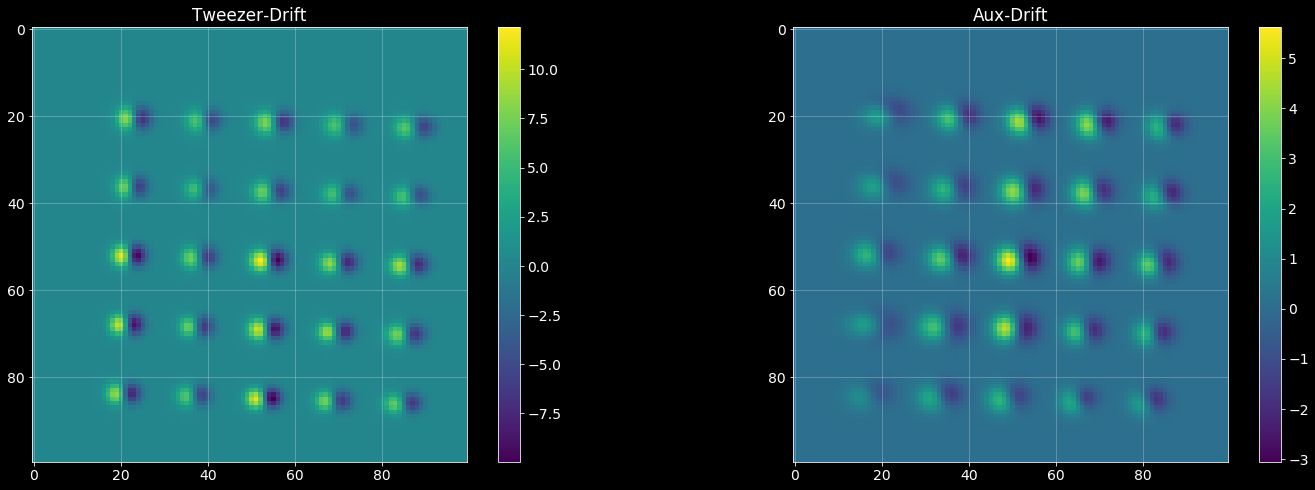

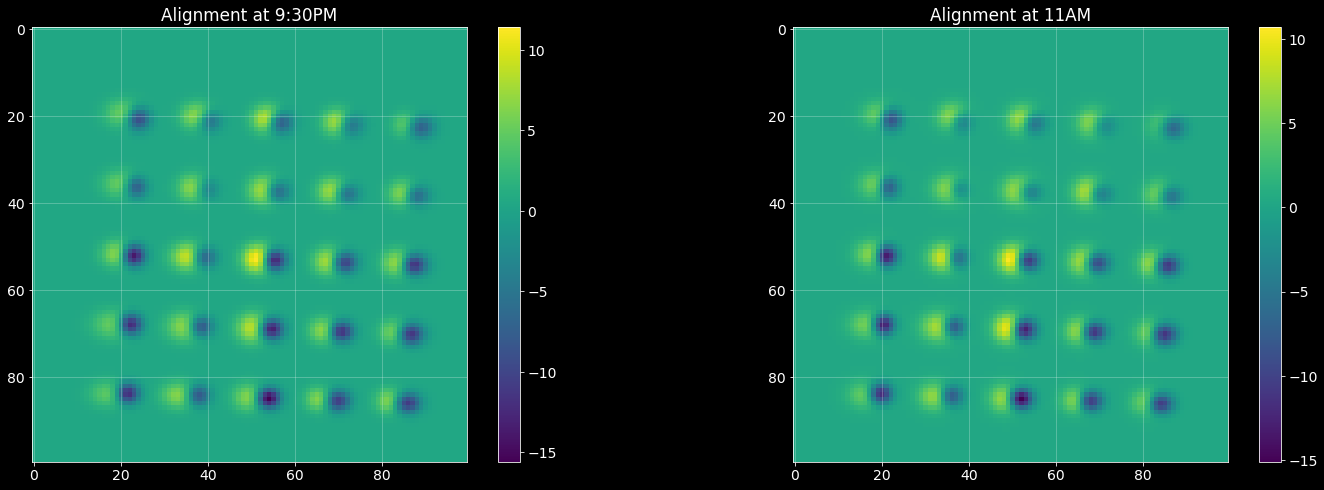

In [433]:
names = ['Tweezers 9:30PM', 'Aux 9:30PM', 'Tweezers 11AM', 'Aux 11AM']
fitVals = [vals_tweezers_930PM,vals_aux_930PM, vals_tweezers_11AM, vals_aux_11AM]
fit_ims = []

for vals in fitVals:
    fit_data = arb_2d_gaussian_sum.f((X,Y), *vals)
    fit_im = np.resize(fit_data, X.shape)
    fit_ims.append(fit_im)
    
f, ax = subplots(1,4)
for n, im, a in zip(names, fit_ims, ax):
    obj = a.imshow(im)
    a.set_title(n)
    colorbar(obj, ax=a)
    
f, ax = subplots(1,2)
a = ax[0].imshow(fit_ims[2] - fit_ims[0])
colorbar(a, ax=ax[0])
ax[0].set_title('Tweezer-Drift')
a = ax[1].imshow(fit_ims[3] - fit_ims[1])
colorbar(a, ax=ax[1])
ax[1].set_title('Aux-Drift')

f, ax = subplots(1,2)
a = ax[0].imshow(fit_ims[1] - fit_ims[0])
ax[0].set_title('Alignment at 9:30PM')
colorbar(a, ax=ax[0])
a = ax[1].imshow(fit_ims[3] - fit_ims[2])
ax[1].set_title('Alignment at 11AM')
colorbar(a, ax=ax[1])


In [ ]:
f, ax = subplots(1,2)
ax[0].imshow()

# The next day atom cals...

In [434]:
day = '12'
reloadMyModules()

In [435]:
with exp.ExpFile() as f:
    f.open_hdf5(12)
    pics = f.get_pics()

In [460]:
ox  = 37
oy = 42
w = h = 43
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

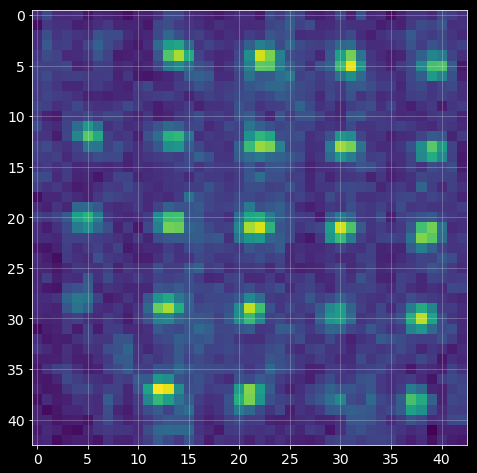

In [461]:
imshow(allPics)

In [462]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [499]:
guess = [80]
angle = 0.5
for xg in range(5):
    for yg in range(5):
        guess += [10, 6+xg*8.2-angle*0.5, 3+yg*8.2 + xg * 0.5, 1, 1]

In [559]:
180*np.arcsin(0.4/8)

9.003754225038604

sin(x)=0.5/8

In [551]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [502]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [503]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

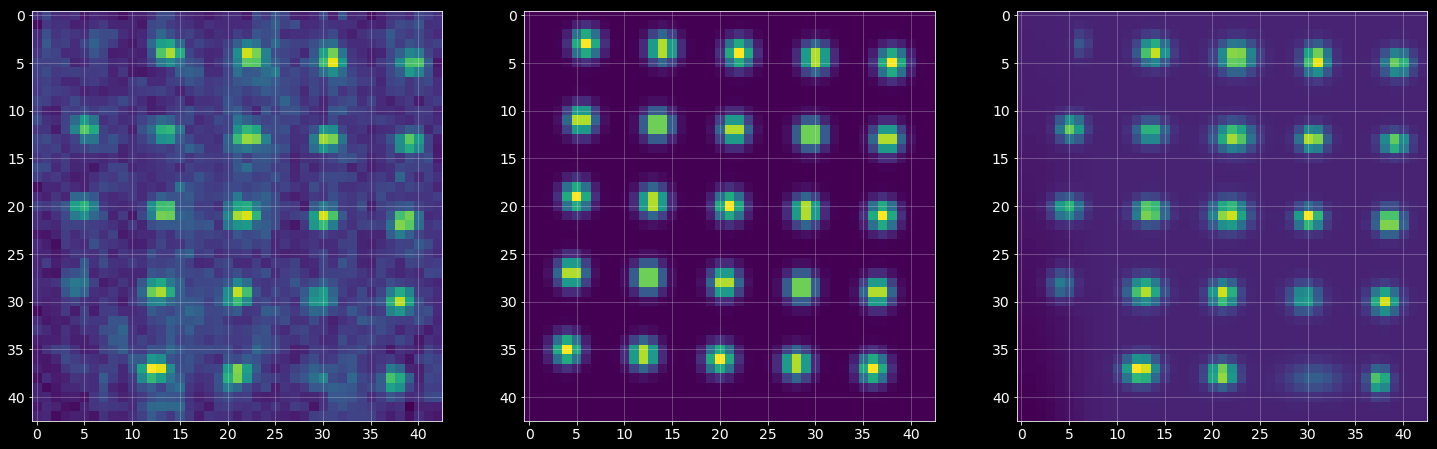

In [504]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [505]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [506]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.49(326)


In [526]:
d = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d_ = np.sqrt(x**2 + y**2)
        if d_ > 10:
            continue
        d += [d_]

In [532]:
d2 = []
for w, h in zip(misc.transpose(x_pos), misc.transpose(y_pos)):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d_ = np.sqrt(x**2 + y**2)
        if d_ > 10:
            continue
        d2 += [d_]

In [533]:
print(misc.errString(np.mean(d), np.std(d),4))
print(misc.errString(np.mean(d2), np.std(d2),4))

8.338(161)
8.401(525)


In [534]:
tweezerCal = (np.mean(d) + np.mean(d2)) / 2 / 18
print(tweezerCal)

0.4649704817476618


In [535]:
tweezerCal*2

0.9299409634953236

In [537]:
18 * 4 * tweezerCal

33.47787468583165

## measuring angle conclusively.

In [747]:
with exp.ExpFile() as f:
    f.open_hdf5(29)
    pics = f.get_pics()

In [748]:
ox  = 67
oy = 198
w = h = 80
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [749]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [750]:
guess = [80]
angle = 0.5
for xg in range(5):
    for yg in range(5):
        guess += [10, 9+xg*15.2-angle*0.5, 8+yg*15.2 + xg * 0.5, 2, 2]

In [751]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [752]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [753]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

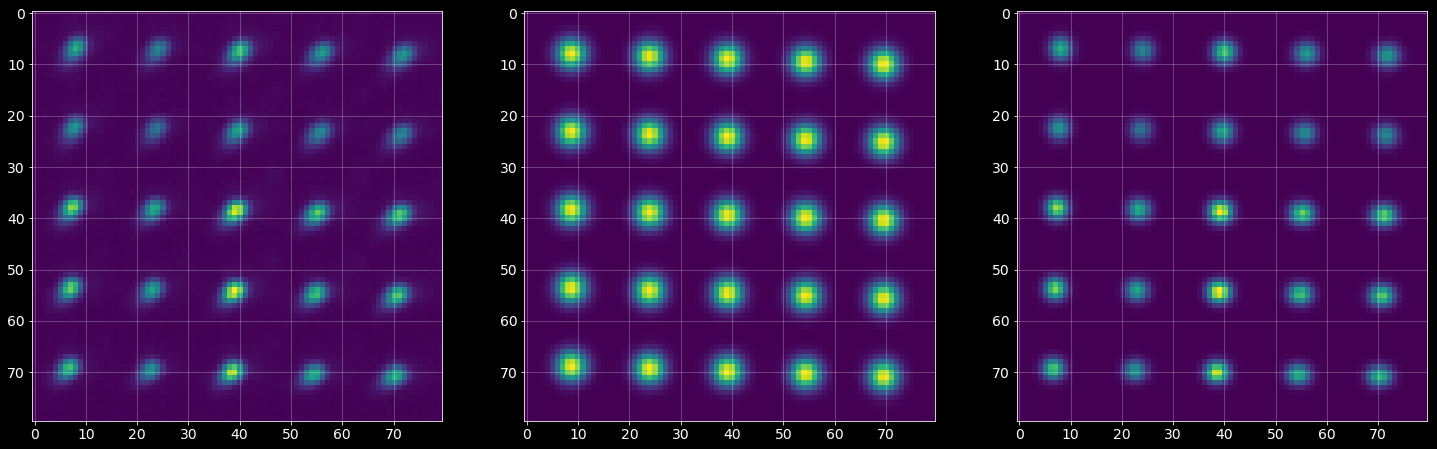

In [754]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [755]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [756]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.49(8)


In [798]:
d = []
angles = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        print(x,y)
        a = np.arctan(x/y)
        angles.append(a)

-0.33009392585209785 15.481779530756445
-0.404061302311856 15.56839359109495
-0.3519155887900327 15.637350846927937
-0.35797509010311224 15.621210451670585
-0.3789350049700495 15.449070873499494
-0.3735913839204237 15.595631937222848
-0.3725633702278657 15.648449506373765
-0.3342675339187551 15.634514760133435
-0.35898390885166975 15.519876391977135
-0.36928154501163846 15.570936818672553
-0.29207525934901923 15.613359138787715
-0.3789311752033271 15.641642101990406
-0.3386023850511819 15.46342710491541
-0.44556488388096227 15.65259966331099
-0.3749907967611392 15.662521183486916
-0.35318599829550124 15.655774804493625
-0.3005156928583972 15.482385248537565
-0.3713501269683377 15.616264572117782
-0.4164923788523254 15.637077202329955
-0.4250356898219252 15.65386450010049


In [785]:
angles_deg = arr(angles) * 180 / np.pi

In [786]:
print(np.mean(angles_deg))

-1.3461608714599795


In [787]:
print(np.mean(arr(angles)))

-0.023494939468492806


In [799]:
print(np.sin(np.mean(arr(angles))) * 8 * 8)

-1.5035377885455818


1 spacer...

In [666]:
with exp.ExpFile() as f:
    f.open_hdf5(33)
    pics = f.get_pics()

In [682]:
ox  = 107
oy = 168
w = h = 80
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [607]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [642]:
guess = [80]
angle = 0.5
for xg in range(5):
    for yg in range(5):
        guess += [10, 9+xg*15.2-angle*0.5, 8+yg*15.2 + xg * 0.5, 2, 2]

In [643]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [646]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [647]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

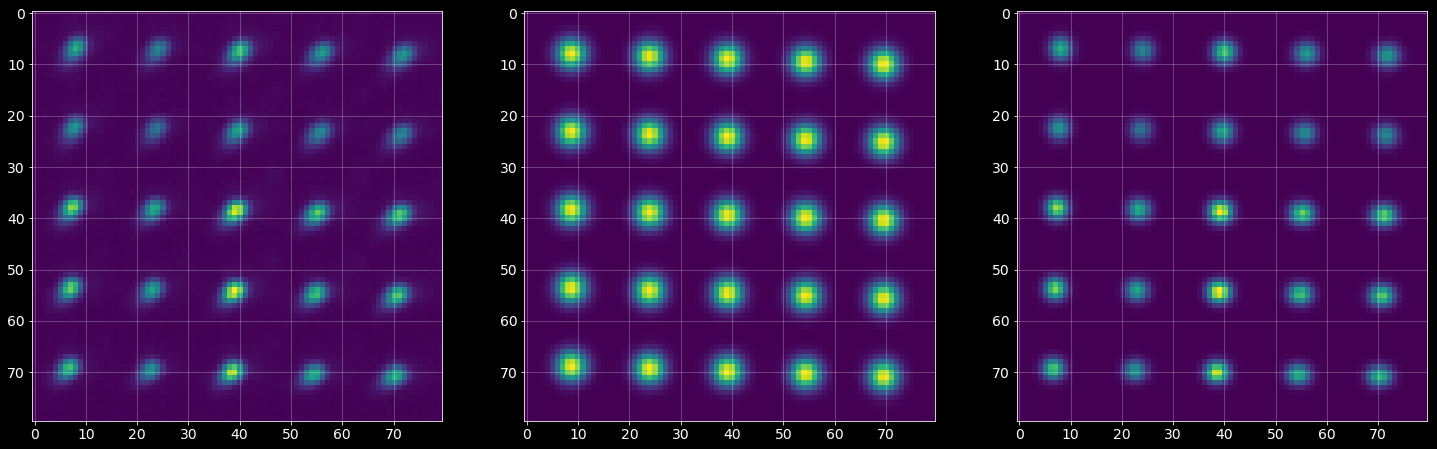

In [648]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [653]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [654]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.49(8)


In [657]:
d = []
angles = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        a = np.arctan(y/x)
        angles.append(180*a)

### best with spacer

In [807]:
with exp.ExpFile() as f:
    f.open_hdf5(42)
    pics = f.get_pics()

In [808]:
ox  = 80
oy = 173
w = h = 85
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

In [809]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [810]:
guess = [80]
angle = 0
for xg in range(5):
    for yg in range(5):
        guess += [10, 9+xg*16-angle*0.5, 8+yg*16 + xg * angle, 2, 2]

In [811]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

In [813]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [814]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

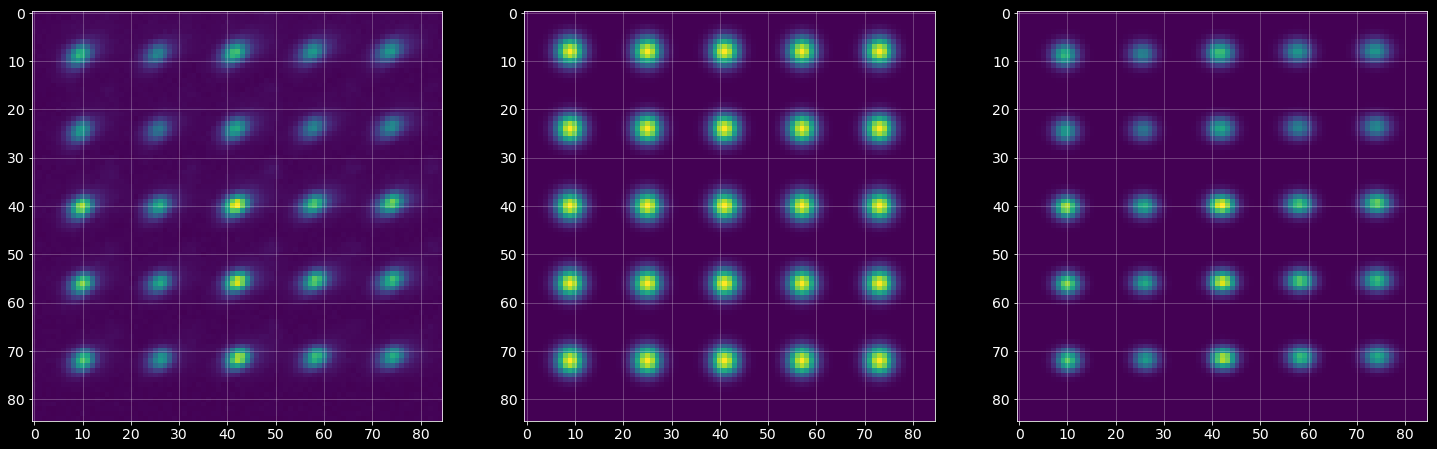

In [815]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [816]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [725]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.73(18)


In [821]:
print(x_pos)

[[ 9.33805652  9.52360906  9.70279992  9.84740282 10.03794653]
 [25.40243398 25.60144958 25.74547972 25.89987273 26.11878728]
 [41.45800172 41.63059604 41.78252237 41.96943598 42.18545096]
 [57.51768834 57.66772026 57.85419374 58.05424326 58.22207671]
 [73.53741708 73.75956199 73.88703852 73.94167116 74.11360211]]


In [817]:
d = []
angles = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        print(x,y)
        a = np.arctan(y/x)
        angles.append(a)

0.18555254409759137 15.712588460373873
0.1791908554728998 15.786794353617335
0.14460290063428793 15.855367566483324
0.1905437146196327 15.838516371047504
0.19901560400809615 15.662970849165774
0.14403013881273097 15.81125020849554
0.1543930060347556 15.845444288427537
0.21891455912364322 15.8568261973141
0.17259432266744312 15.723948378961454
0.15192632686443375 15.789736682631876
0.18691361191414302 15.866820463417405
0.21601498382135986 15.869841089264384
0.1500319277003186 15.724387293532924
0.18647347955401017 15.841111548114913
0.20004951996636322 15.83579544792331
0.16783344338885797 15.862615463890663
0.22214490595446534 15.729270517409944
0.12747653260034042 15.787574879495708
0.054632642283948485 15.903717731026823
0.17193094871262815 15.88811468371157


In [818]:
angles_deg = arr(angles) * 180/np.pi

In [819]:
print(90-np.mean(arr(angles_deg)))

0.6206162710548568


In [820]:
np.sin(np.pi/2 - arr(angles))*8

array([0.09446673, 0.09079959, 0.07295795, 0.09623625, 0.10164076,
       0.07287174, 0.07794577, 0.11043506, 0.08780692, 0.07697116,
       0.09423471, 0.10888325, 0.07632735, 0.09416539, 0.10105387,
       0.08463878, 0.11297295, 0.06459377, 0.02748153, 0.08656578])

### atoms

In [900]:
with exp.ExpFile() as f:
    f.open_hdf5(43)
    pics = f.get_pics()

In [901]:
ox  = 65
oy = 65
w = h = 120
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

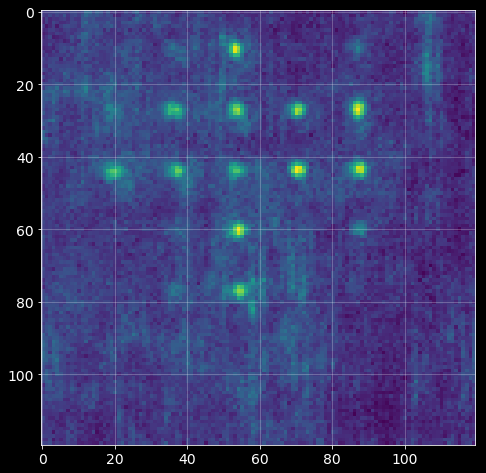

In [902]:
imshow(allPics)

In [903]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [911]:
guess = [80]
angle = 0
for xg in range(5):
    for yg in range(5):
        if (xg, yg) in [(0,0),(1,0),(3,0),(0,3), (1,3), (3,3), (0,4), (3,4), (4,4), (0,1), (1,4), (4,0)]:
            continue
        guess += [10, 20+xg*16-angle*0.5, 12+yg*16 + xg * angle, 2, 2]

In [912]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

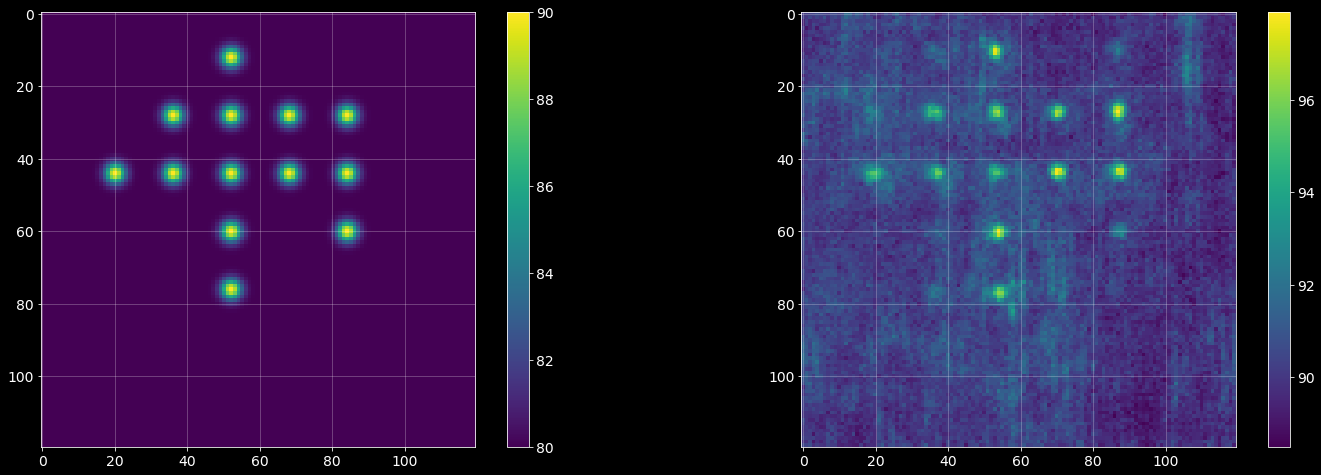

In [913]:
f, ax = subplots(1,2)
a = ax[0].imshow(guess_im)
colorbar(a, ax=ax[0])
a = ax[1].imshow(allPics)
colorbar(a, ax=ax[1])

In [914]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



In [915]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

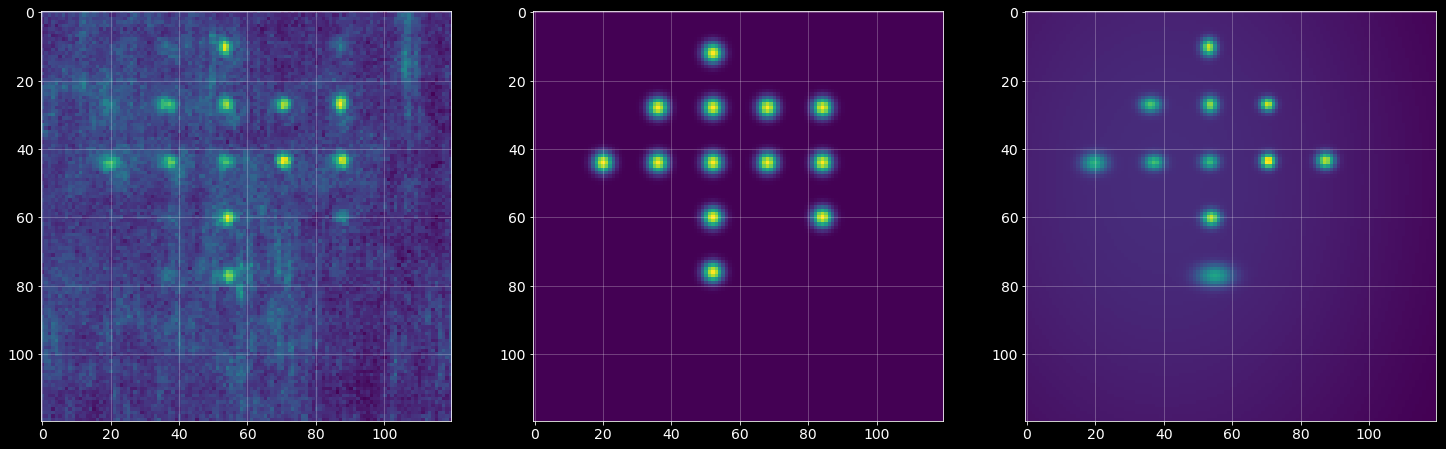

In [916]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [918]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(12)]
x_pos = [vals[2+5*i] for i in range(12)]
for x,y in zip(x_pos, y_pos):
    print(x,y)

19.770021473184425 44.0982699686582
36.15955171792941 27.140968921916414
37.17691160209428 43.92605127323074
53.15245185273904 10.321437272144511
53.538238200897865 27.184238124737284
53.432695242737374 43.78044345083078
53.873438587361804 60.25531771622416
54.980630286794984 77.00655557009358
70.31965868944364 27.093800262501826
70.4627428174616 43.587541787925446
130.75592861506348 37.05494018519124
87.2527619421835 43.44808508795537


In [955]:
pairs = [(0,2),(1,2),(3,4), (4,5), (5,6), (6,7),(1,4),(2,5),(8,9),(9,11),(4,8),(5,9)]

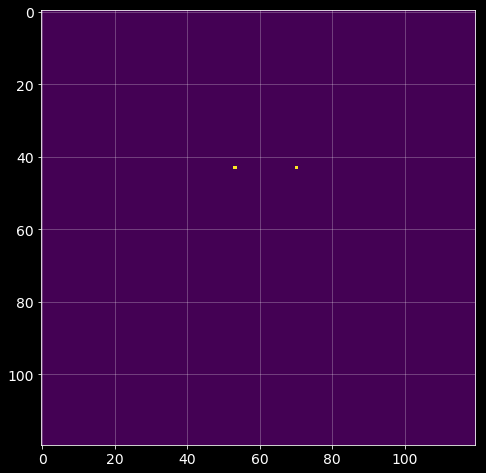

In [954]:
data = np.zeros(allPics.shape)
p = (5,9)
data[int(y_pos[p[0]]),int(x_pos[p[0]])] = 1
data[int(y_pos[p[1]]),int(x_pos[p[1]])] = 1
imshow(data)

In [958]:
d = []
for p in pairs:
    x = x_pos[p[0]] - x_pos[p[1]]
    y = y_pos[p[0]] - y_pos[p[1]]
    d.append(np.sqrt(x**2 + y**2))
print(d)

print(misc.errString(np.mean(d),np.std(d)))

[17.4077420488412, 16.815885664285172, 16.867213276075848, 16.596540920983244, 16.480768694340437, 16.787788511182807, 17.37874034840337, 16.256435753551383, 16.494362145144446, 16.79059827342949, 16.781664179106603, 17.03114005135658]
16.8(3)


In [960]:
16.8 / (18)

0.9333333333333333

In [966]:
8.6*16.8/18 * 4

32.10666666666666

In [964]:
8/(0.9 + 1/30)

8.571428571428571

#### 2

In [892]:
with exp.ExpFile() as f:
    f.open_hdf5(44)
    pics = f.get_pics()

In [893]:
ox  = 65
oy = 65
w = h = 120
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

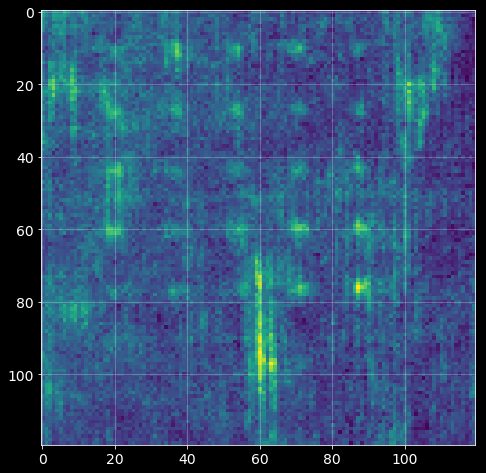

In [894]:
imshow(allPics)

horFreqs [40.6, 57.8, 75.0, 92.19999999999999, 109.4]
horAmps [1. 1. 1. 1. 1.]
Hor-Phases: ['0.02097139011', '0.1412460483', '2.070323639', '5.809208974', '0.000000000']
vertFreqs [40.6, 57.8, 75.0, 92.19999999999999, 109.4]
vertAmps [1. 1. 1. 1. 1.]
Vert-Phases: ['0.2352640493', '0.2810410356', '2.136529168', '5.800390635', '0.000000000']


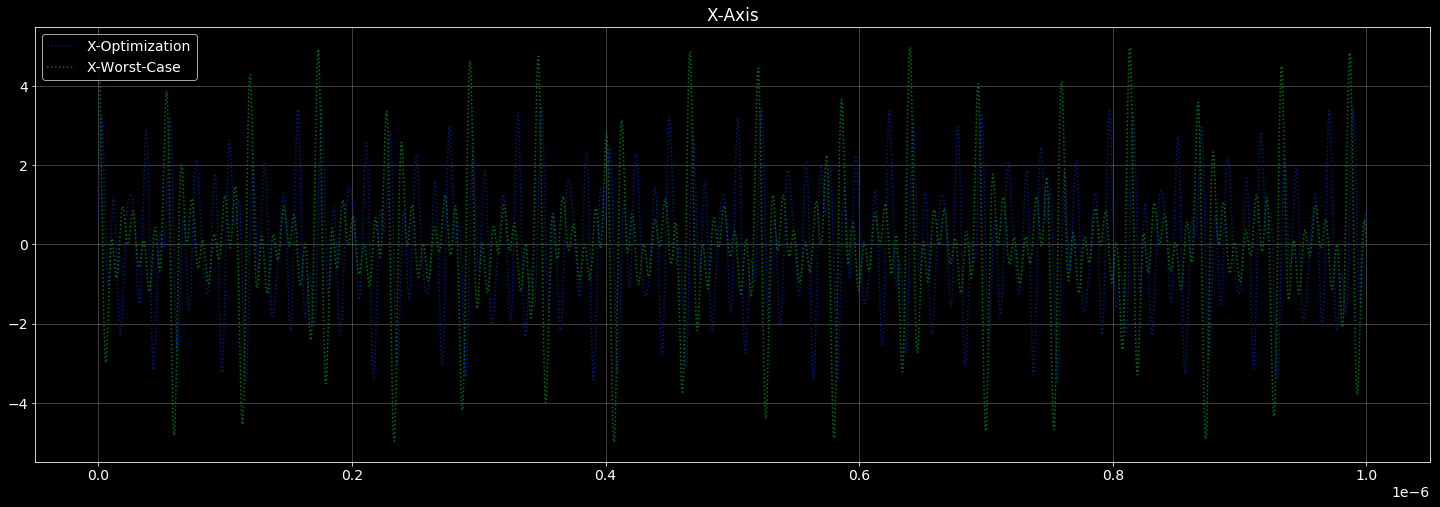

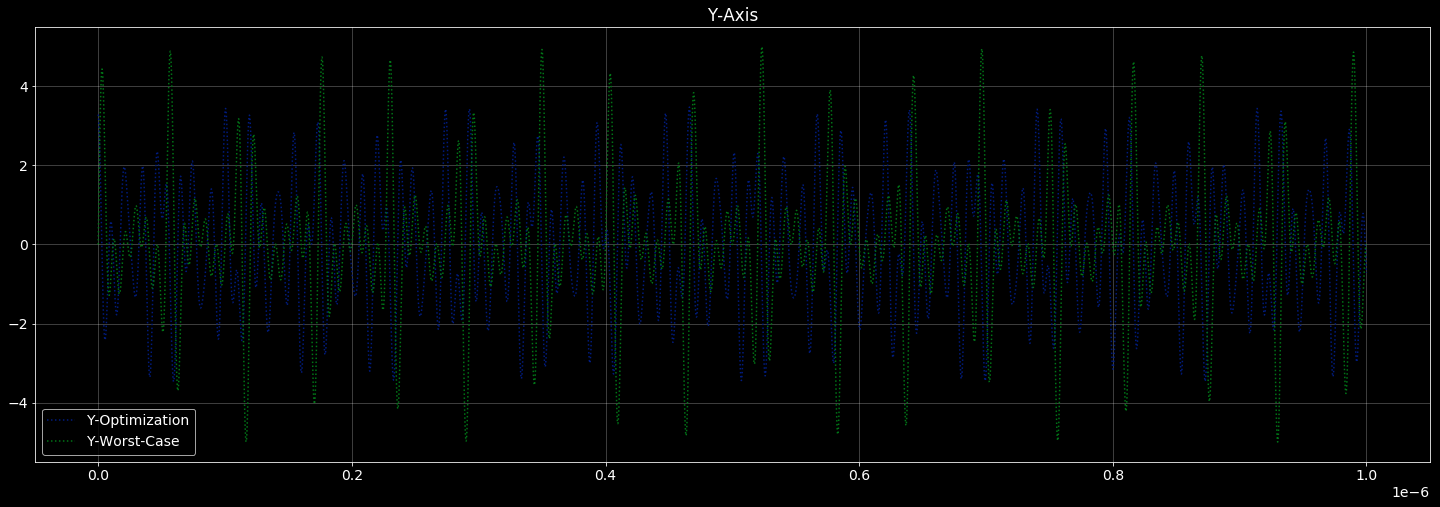

In [1055]:
ah.maximizeAomPerformance(75, 75, 8.6*2, 5,5);

#### 3

In [ ]:
import ExpFile as exp

In [1075]:
reload(exp)
reloadMyModules()

In [1076]:
with exp.ExpFile(45) as f:
    f.print_functions(brief=False)

 - 2_to_2p_pushout_all.func: 
---------------------------------------
% pushout(), but with the repump on.
def 2_to_2p_pushout_all():
  var pushout_power 0.01
  var pushout_freq 0
  var pushout_time 15
  off: sideMotRf
  on: RepumpRF
  dac: RepumpPower 0.05
  daclinspace: motFreq defaultMotFreq pushout_freq 1 5 
  t += 5.01
  dac: depumpPower pushout_power  
  on: depumpingRf
  t += pushout_time
  off: depumpingRf
  daclinspace: motFreq pushout_freq defaultMotFreq 1 5
  t += 5.01


---------------------------------------
count= 433

 - SetDefaultTtls.func: 
---------------------------------------
% Total Time Added: t += 0.1

% These (historically) have always been called at the beginning
% of an experiment.
def SetDefaultTtls():
	% Turning on the Dipole trap with standard parameters:    
	on: TweezerRf
	% Explicitly initializing important TTLs at the beginning of each sequence:
      off: IntensityTrigger
	off: AxialUwaveGaussianPulseTrig
	off: TopBottomGaussianPulseTrig
	off: RsgTrig

In [974]:
with exp.ExpFile() as f:
    f.open_hdf5(45)
    pics = f.get_pics()

In [984]:
ox  = 5
oy = 0
w = h = 90
allPics = np.zeros((w,h))
for p in pics:
    allPics += p[ox:ox+w,oy:oy+h]
allPics /= len(pics)

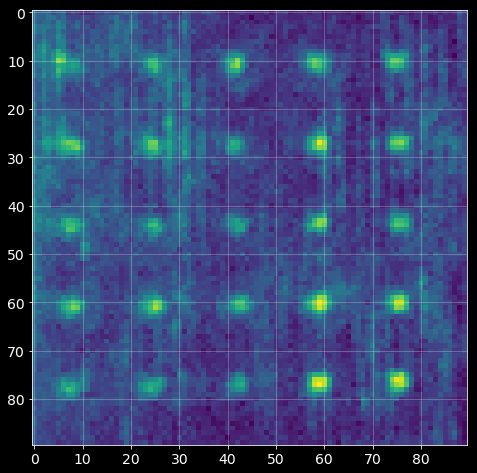

In [985]:
imshow(allPics)

In [986]:
x = np.arange(allPics.shape[0])
y = np.arange(allPics.shape[1])
X, Y = np.meshgrid(x,y)

In [1049]:
guess = [92.5]
angle = 0
spacing = 16.8
amplitudes = arr(
             [6,5,6,6,3,
              6,6,5,6,3,
              5,3,3,6,3,
              6,6,6,6,6,
              6,6,6,6,6]) + 1
i =0
for xg in range(5):
    for yg in range(5):
        guess += [amplitudes[i], 7.5+xg*spacing-angle*0.5, 10.5+yg*spacing + xg * angle, 1.5, 1.5]
        i+= 1

In [1050]:
guess_data = arb_2d_gaussian_sum.f((X,Y),*guess)
guess_im = np.resize(guess_data, X.shape)

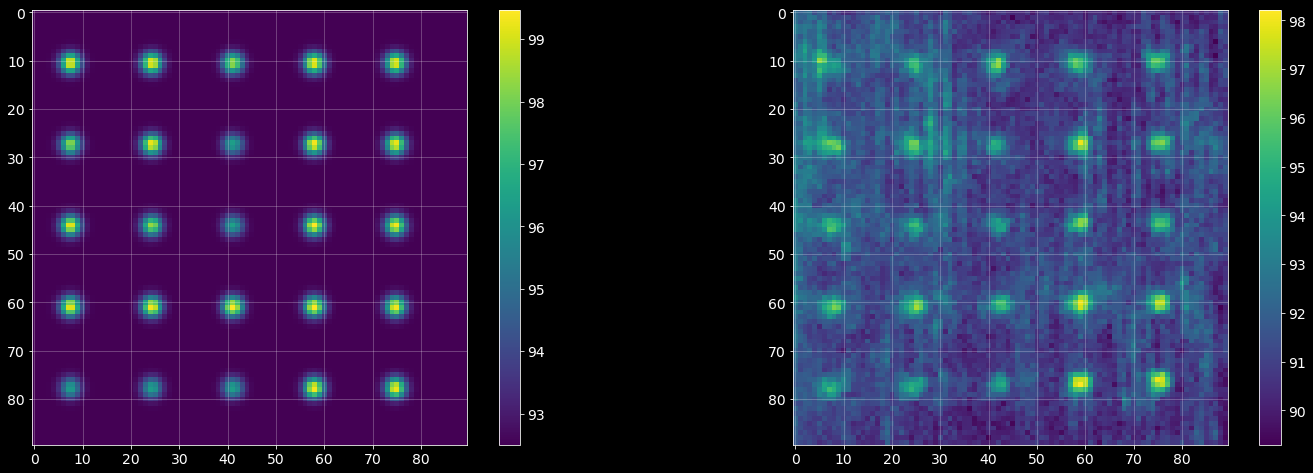

In [1051]:
f, ax = subplots(1,2)
a = ax[0].imshow(guess_im)
colorbar(a, ax=ax[0])
a = ax[1].imshow(allPics)
colorbar(a, ax=ax[1])

In [1052]:
vals, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (X,Y), allPics.flatten(), p0 = guess)

In [1053]:
fit_data = arb_2d_gaussian_sum.f((X,Y),*vals)
fit_im = np.resize(fit_data, X.shape)

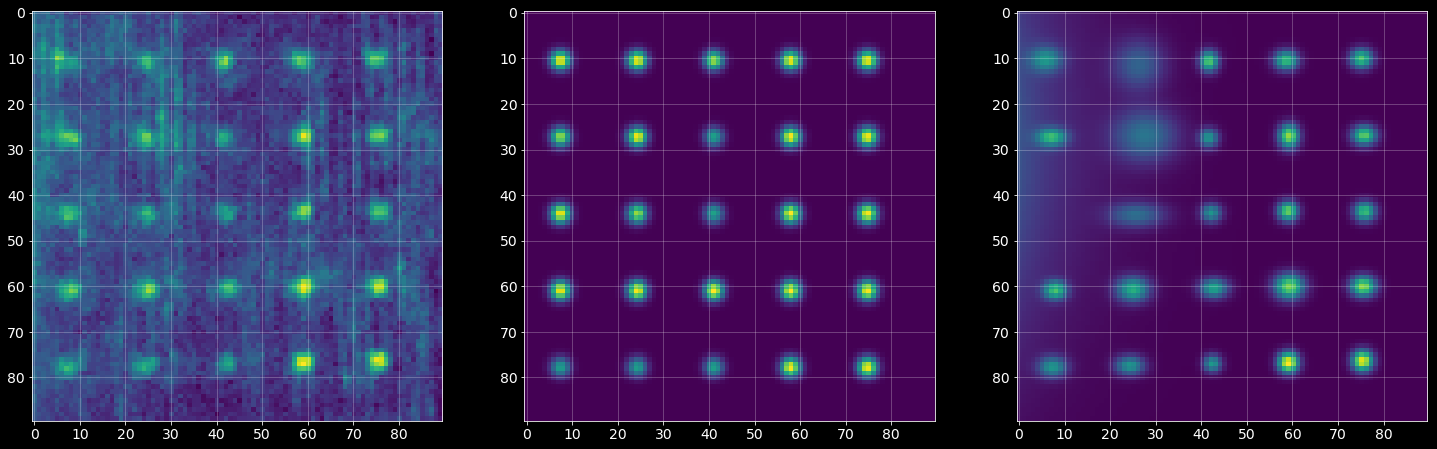

In [1054]:
f, ax = subplots(1,3)
ax[0].imshow(allPics)
ax[1].imshow(guess_im)
ax[2].imshow(fit_im)

In [208]:
x_spacings = []
y_spacings = []
y_pos = [vals[3+5*i] for i in range(25)]
y_pos = np.reshape(y_pos, (5,5))
x_pos = [vals[2+5*i] for i in range(25)]
x_pos = np.reshape(x_pos, (5,5))

In [228]:
widths = np.abs([vals[4+5*i] for i in range(25)]+[vals[5+5*i] for i in range(25)])
print(misc.errString(np.mean(widths), np.std(widths)))

1.85(18)


In [214]:
d = []
for w, h in zip(x_pos, y_pos):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d += [np.sqrt(x**2 + y**2)]

In [217]:
d2 = []
for w, h in zip(misc.transpose(x_pos), misc.transpose(y_pos)):
    for i in range(len(w)-1):
        x = w[i+1] - w[i]
        y = h[i+1] - h[i]
        d2 += [np.sqrt(x**2 + y**2)]

In [219]:
print(misc.errString(np.mean(d), np.std(d),4))
print(misc.errString(np.mean(d2), np.std(d2),4))

16.58(7)
16.81(5)


In [253]:
tweezerCal = (np.mean(d) + np.mean(d2)) / 2 / 18.8
print(tweezerCal)

0.8878552094771142
